# Exploration of Loan Data from Prosper of the borrowers who are unemployed
## by Ajeethaa

## Investigation Overview

> Thorough this project, I have investigated to find out how the unemployed borrowers fare, not only in securing a loan but in getting a fair deal in terms of loan terms and the interest rate. I have also looked into the number of overdue payments and compared these data with their monthly income and monthly loan payment.

## Dataset Overview

> The investigation involved a total of 113937 borrowers of which were categorised into two employment statuses; employed and unemployed. The data therein were analysed and cleaned for inconsistencies, tidiness and quality.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('LoanData.csv')
new_variables = ['Term','BorrowerRate','LoanOriginalAmount','EstimatedReturn','EmploymentStatus','TotalProsperLoans','AmountDelinquent','StatedMonthlyIncome','OnTimeProsperPayments','LoanCurrentDaysDelinquent', 'MonthlyLoanPayment']
df_new = df[new_variables]

df_unemployed = df_new[df.EmploymentStatus.isin(["Not employed", "Retired"])]
df_employed = df_new[df.EmploymentStatus.isin(["Employed", "Full-time", "Self-employed", "Part-time"])]

df_others = df_new[df.EmploymentStatus.isin(["Not available", "Other", "No_Status"])]
df_hasincome = df_others.loc[df_others['StatedMonthlyIncome'] != 0]
df_employed = df_employed.append(df_hasincome, ignore_index = True)

df_noincome = df_others.loc[df_others['StatedMonthlyIncome'] == 0]
df_unemployed = df_unemployed.append(df_noincome, ignore_index = True)

## Borrower Rate for Unemployed and Employed

> This visual highlights interest rates on loans, in which case both groups have the highest interest rate of about 0.3. But do take note in the difference when it comes to the second highest rate for both groups. In the 'employed' case, the second highest is about 0.15 which is lower than the count for the unemployed.

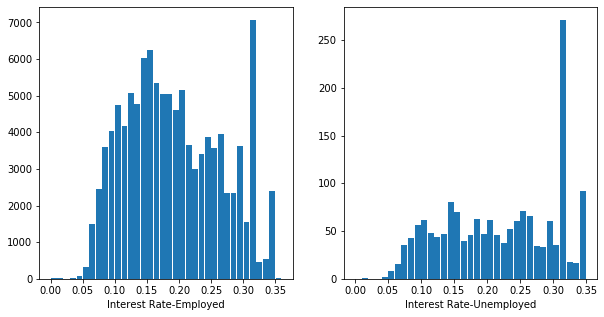

In [5]:
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
bins = np.arange(0, df_employed['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data = df_employed, x = 'BorrowerRate', bins = bins, rwidth = 0.9)
plt.xlabel('Interest Rate-Employed');

plt.subplot(1,2,2)
bins = np.arange(0, df_unemployed['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data = df_unemployed, x = 'BorrowerRate', bins = bins, rwidth = 0.9)
plt.xlabel('Interest Rate-Unemployed');

## Monthly Loan Payment and Original Loan Amount

> This visual highlights the difference in loan payments and loan amount. It appears that the higher the loan amount, the higher the monthly payment except in one case where a loan amount of 25000 gets to pay about 200 or so each month. As one can observe in the comparison plot (employed), there are a number of borrowers who pay less than 200 for a loan amount of 25000.

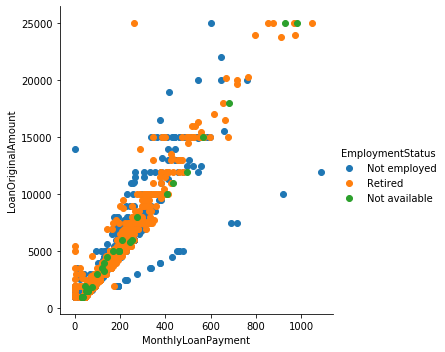

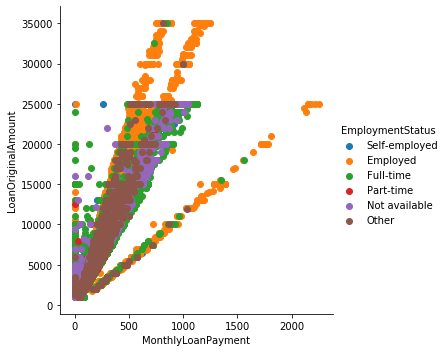

In [10]:
g = sb.FacetGrid(data = df_unemployed, hue = 'EmploymentStatus', size = 5)
g.map(plt.scatter,'MonthlyLoanPayment', 'LoanOriginalAmount');
g.add_legend();

g = sb.FacetGrid(data = df_employed, hue = 'EmploymentStatus', size = 5)
g.map(plt.scatter,'MonthlyLoanPayment', 'LoanOriginalAmount');
g.add_legend();

## How the unemployed fare when compared to the employed

> In conclusion, inspite the difference in the population size between the groups, one can observe similiarties between them as well. It is certain that almost borrowers have 36 months as their loan term. And the biggest loan amount tend to be within 10,000 dollars.
> The maximum number of loans which is 8 is held by a borrower who is employed. The unemployed have fewer than 4 loans as compared to the retirees in the unemployed group.

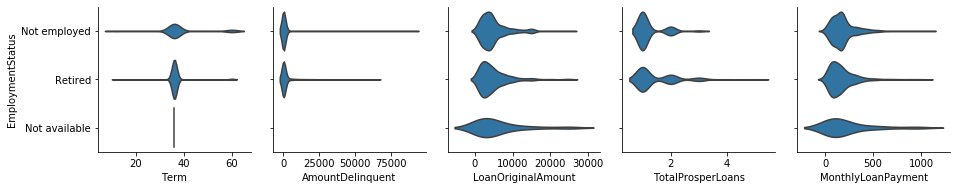

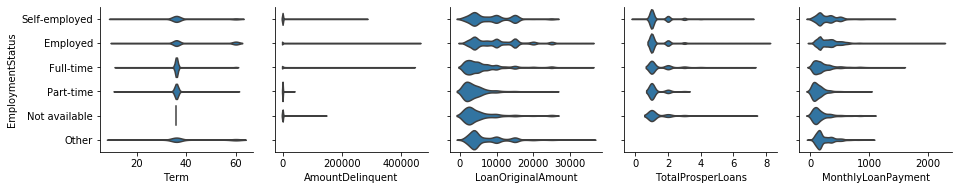

In [6]:
g = sb.PairGrid(data = df_unemployed, x_vars = ['Term', 'AmountDelinquent', 'LoanOriginalAmount', 'TotalProsperLoans', 'MonthlyLoanPayment'],
                y_vars = ['EmploymentStatus']);
g.map(sb.violinplot, inner = None);

g = sb.PairGrid(data = df_employed, x_vars = ['Term', 'AmountDelinquent', 'LoanOriginalAmount', 'TotalProsperLoans', 'MonthlyLoanPayment'],
                y_vars = ['EmploymentStatus']);
g.map(sb.violinplot, inner = None);

In [ ]:
!jupyter nbconvert "Presentation_Slides.ipynb" --to slides --post serve --template output_toggle